In [8]:
import numpy as np
# Defining the Linear function Layer for Neural network
class Linear():
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size) * 0.01
        self.B = np.zeros((1, out_size))
        self.params = [self.W, self.B]
        self.gradW = None
        self.gradB = None
        self.gradInput = None
    
    def forward(self, X):
        self.X = X
        output = np.dot(self.X, self.W) + self.B
        return output
    
    def backward(self, nextgrad):ß
        self.gradW = np.dot(self.X.T, nextgrad)
        self.gradB = np.sum(nextgrad, axis=0)
        self.gradInput = np.dot(nextgrad, self.W.T)
        return self.gradInput, [self.gradW, self.gradB]

In [9]:
# Defining the Rectifier Linear Activation Layer
class ReLu():
    def __init__(self, X):
        self.params = []
        self.gradInput = None
    
    def forward(self, X):
        output = np.max(X, 0)
        return output

    def backward(self, nextgrad):
        self.gradInput = nextgrad.copy
        self.gradInput[self.gradInput < 0] = 0
        return self.gradInput, []

In [10]:
# Defining softmax activation function
def softmax(X):
    exp_x = np.exp(X - np.max(X, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [29]:
# Defining cross entropy loss function
class CrossEntropy:
    def forward(self, X, y):
        self.m = y.shape[0]
        self.p = softmax(X)
        cross_entropy = -np.log(self.p[range(self.m), y]+1e-16)
        loss = np.sum(cross_entropy)/self.m
        return loss

    def backward(self, X, y):
        y_idx = y.argmax()
        grad[range(self.m), y] -= 1
        grad /= self.m
        return grad

In [33]:
# load the dataset and reshape the data
from keras.datasets import mnist
from keras.utils import np_utils

(train_features, train_targets), (test_features, test_targets) = mnist.load_data()

train_features = train_features.reshape(60000, 784)
print(train_features.shape)
test_features = test_features.reshape(10000, 784)
print(test_features.shape)

# normalize inputs from 0 to 255 to 0 to 1
train_features = train_features/255.0
test_features = test_features/255.0

print(train_targets.shape)
print(test_targets.shape)

X_train = train_features
y_train = train_targets

X_val = test_features
y_val = train_targets

(60000, 784)
(10000, 784)
(60000,)
(10000,)


label for each of the above image: [5 0 4 1 9 2 1 3 1 4]


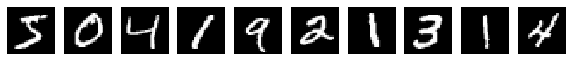

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.axis('off')
print('label for each of the above image: %s' % (y_train[:10]))
plt.show()

In [43]:
# Defining neural network 
class NN():
    def __init__(self, lossfunc=CrossEntropy(), mode='train'):
        self.params = []
        self.layers = []
        self.lossfunc = lossfunc
        self.grad = []
        self.mode = mode
    
    def add_layer(self, layer):
        self.layers.append(layer)
        self.params.append(layer.params)

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X

    def backward(self, nexgrad):
        self.clear_grad_param()
        for layer in reversed(self.layers):
            nextgrad, grad = layer.backward(nextgrad)
            self.grad.append(grad)
        return self.grad

    def train_step(self, X, y):
        """ function used to train the nueral network.
        
        Parameters
        ----------
        X : list
            Training set to train the samples
        y : list
            labels to train the samples
        """
        out = self.forward(X)
        loss = self.lossfunc.forward(out, y) + ((Lambda / (2 * y.shape[0])) * np.sum([np.sum(w**2) for w in self.params[0][0]]))
        nextgrad = self.lossfunc.backward(out, y) + ((Lambda / y.shape[0]) * np.sum([np.sum(w) for w in self.params[0][0]]))
        grads = self.backward(nextgrad)
        return loss, grads

    def predict(self, X):
        X = self.forward(X)
        p = softmax(X)
        return np.argmax(p, axis=1)

    def predict_scores(self, X):
        X = self.forward(X)
        p = softmax(X)
        return p

    def clear_grad_param(self):
        self.grad = []

In [40]:
def update(velocity, params, grads, learning_rate=0.01, mu=0.9):
    for v, p, g in zip(velocity, params, reversed(grads)):
        for i in range(len(g)):
            v[i] = (mu * v[i]) - (learning_rate * grad[i])
            p[i] += v[i] 

In [41]:
# get minibatches
def minibatch(X, y, minibatch_size):
    n = X.shape[0]
    minibatches = []
    permutation = np.random.permutation(X.shape[0])
    X = X[permutation]
    y = y[permutation]

    for i in range(0, n, minibatch_size):
        X_batch = X[i:i + minibatch_size, :]
        y_batch = y[i:i + minibatch_size,]
        minibatches.append((X_batch, y_batch))
    return minibatches

In [ ]:
def sgd(net: NN, X_train, y_train, minibatch_size, epoch, learning_rate, mu=0.9, X_val=None, y_val=None, Lambda=0, Verb=True):
    val_loss_epoch = []
    minibatches = minibatch(X_train, y_train, minibatch_size)
    minibatches_val = minibatch(X_val, y_val)

    for i in range(epoch):
        loss_batch = []
        val_loss_batch = []
        velocity = []
        for param_layer in net.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)

        # iterate over minibatches
        for x_mini, y_mini in minibatches:
            loss, grad = net.train_step(x_mini, y_mini)
            loss_batch.append(loss)
            update(velocity, net.params, grad, learning_rate=learning_rate, mu=mu)
        
        for x_mini_val, y_mini_val in minibatches_val:
            val_loss, _ = net.train_step(x_mini_val, y_mini_val)
            val_loss_batch.append(val_loss)

        # accuracy of model at end of epoch after all mini batch updates
        m_train = X_train.shape[0]
        m_val = X_val.shape[0]
        y_train_pred = []
        y_val_pred = []
        y_train1 = []
        y_val1 = []

        for ii in range(0, m_train, minibatch_size):
            x_tr = X_train[ii:ii+minibatch_size, :]
            y_tr = y_train[ii:ii+minibatch_size,]
            y_train1= np.append(y_train1, y_tr)
            y_train_pred = np.append(y_train_pred, net.predict(x_tr))